In [85]:
import numpy as np

def getChoice(V,e): #εグリーディで行動選択
    idx=np.argmax(V)#最大値のインデックスを返す
    if np.random.rand()<e or V[idx]==-1: #Vの最大値が-1の時は全部のVが-1
        k=np.random.randint(0,4)#ランダムに選ぶ
        return act[k]
    else:
        return act[idx] #最大の価値を持つ選択肢

act=["up","down","left","right"]
V=np.zeros(4)#価値を入れる
alpha=0.2
e=0.1
ite=50 #繰り返し回数
reward=np.zeros(ite)#総得点を記録
episode=np.zeros(ite)#何回でゴールまで行ったか記録

for i in range(ite):
    current=[0,0]#スタート位置
    goal=0
    r=0
    while goal==0:#ゴールしてなければ
        a=getChoice(V,e)
        #print("a: ",a)
        if a==act[0]:
            if current[0]!=0:#端でなければ
                current[0]-=1#ひとつ動く
            t=0
        elif a==act[1]:
            if current[0]!=3:
                current[0]+=1
            t=1
        elif a==act[2]:
            if current[1]!=0:
                current[1]-=1
            t=2
        else:
            if current[1]!=3:
                current[1]+=1
            t=3
        r=-1 #一回につき-1
        
        if current==[3,3]:
            goal=1 #ゴールした
            r+=101
            
        V[t]=V[t]+alpha*(r-V[t])#ここで学習
        
        reward[i]+=r
        episode[i]+=1
        
    print("goalしました。",V) 

goalしました。 [-1.  19.2 -1.  -1. ]
goalしました。 [-1.         -0.92368656 -1.         19.2       ]
goalしました。 [-1.         19.23907248 -1.         -0.9511594 ]
goalしました。 [-1.         -0.97494524 -1.         19.22500639]
goalしました。 [-1.         19.21282804 -1.         -0.9839761 ]
goalしました。 [-1.         -0.98975088 -1.         19.20820424]
goalしました。 [-1.         19.20524755 -1.         -0.99344206]
goalしました。 [-1.         -0.99580353 -1.         19.20335766]
goalしました。 [-1.         19.20214859 -1.         -0.99731451]
goalしました。 [-1.         -0.99862511 -1.         19.20109998]
goalしました。 [-1.         19.20070394 -1.         -0.99912012]
goalしました。 [-1.         -0.99943689 -1.         19.2004505 ]
goalしました。 [-1.         19.20018452 -1.         -0.99976935]
goalしました。 [-1.         -0.99985239 -1.         19.20011809]
goalしました。 [-1.         19.20007558 -1.         -0.99990553]
goalしました。 [-1.         -0.99995163 -1.         19.2000387 ]
goalしました。 [-1.         19.20002477 -1.         -0.99890021]
goalしました

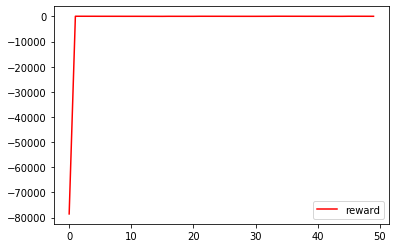

In [86]:
import matplotlib.pyplot as plt
plt.plot(reward,label="reward",color="red")
plt.legend()
plt.show()

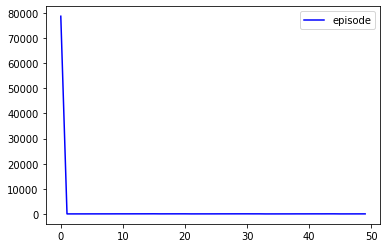

In [94]:
plt.plot(episode,label="episode",color="blue")
plt.legend()
#plt.ylim([0,200])
plt.show()

In [88]:
reward[-10:] #最後の10回の報酬を確認

array([55., 51., 53., 45., 45., 72., 69., 66., 63., 60.])

In [90]:
episode[-10:]

array([46., 50., 48., 56., 56., 29., 32., 35., 38., 41.])